In [10]:
import os
from PIL import Image, ImageMorph
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from skimage.transform import rotate
import cv2
from torch.utils.data import DataLoader, Dataset


In [11]:
data_path = "./data/train/"

image_fns = os.listdir(data_path)
print(len(image_fns))
print(np.unique([len(image_fn.split(".")[0]) for image_fn in image_fns]))

9
[15 16 24]


## Image Preprocessing

In [12]:
def segment_yellow(image_path):
   # Load the image
   image = cv2.imread(image_path)

   # Convert the image to HSV color space
   hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

   # Define range of yellow color in HSV
   lower_yellow = np.array([20,100,100])
   upper_yellow = np.array([30,255,255])

   # Threshold the HSV image to get only yellow colors
   mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

   return mask

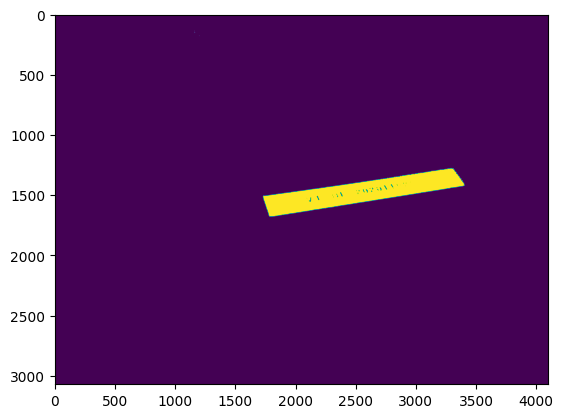

In [13]:
image_path = data_path + image_fns[0]
image_with_yellow_segment = segment_yellow(image_path)
plt.imshow(image_with_yellow_segment)

## Text Detection using pytorch

Need more research

In [14]:
class TextDetectionDataset(Dataset):
    def __init__(self, root_dir):
        self.root_dir = root_dir
        self.image_paths = [os.path.join(root_dir, file) for file in os.listdir(root_dir) if file.endswith(('.jpg', '.jpeg', '.png'))]

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert("RGB")
        return image

## Experimental using DocTR

In [15]:
import os
from doctr.models import detection_predictor
# Let's pick the desired backend
# os.environ['USE_TF'] = '1'
os.environ['USE_TORCH'] = '1'

import matplotlib.pyplot as plt

from doctr.io import DocumentFile
from doctr.models import ocr_predictor
from doctr.models import recognition_predictor

In [16]:
doc = DocumentFile.from_images([image_path])
# predictor = detection_predictor('db_resnet50', pretrained=True, assume_straight_pages=False)
predictor = detection_predictor('db_resnet50_rotation', pretrained=True, assume_straight_pages=False, preserve_aspect_ratio=True)
boxes = predictor(doc)
# result.show(doc)
print(len(boxes))

1


In [17]:
recognizer = recognition_predictor('crnn_vgg16_bn', pretrained=True)
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

ValueError: operands could not be broadcast together with shapes (4,2) (4,) 

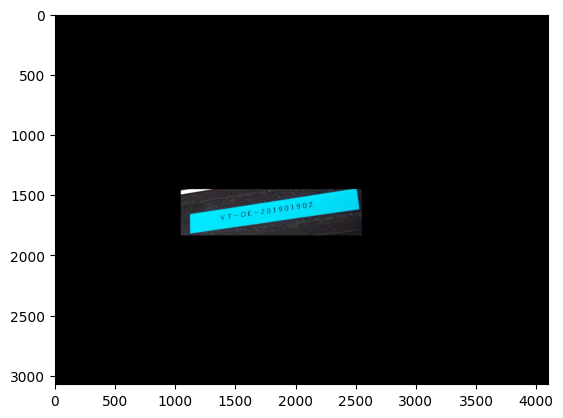

In [24]:
import os
import cv2
from doctr.models import detection_predictor
from matplotlib import patches
# Let's pick the desired backend
# os.environ['USE_TF'] = '1'
os.environ['USE_TORCH'] = '1'

import matplotlib.pyplot as plt

from doctr.io import DocumentFile
from doctr.models import ocr_predictor
from doctr.models import recognition_predictor
import numpy as np


data_path = "./data/train/"
image_fns = os.listdir(data_path)
image_path = data_path + "VT-OE-201901902(Scaled).jpg"
doc = DocumentFile.from_images([image_path])
# predictor = detection_predictor('db_resnet50', pretrained=True, assume_straight_pages=False)
predictor = detection_predictor('db_resnet50_rotation', pretrained=True, assume_straight_pages=False)
img = cv2.imread(image_path)
rectangles = predictor([img])

# Create a figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(img)
for rect_data in rectangles:
    for rect in rect_data['words']:
        # Convert normalized coordinates to pixel coordinates
        rect_pixel_coords = rect * np.array([img.shape[1], img.shape[0], img.shape[1], img.shape[0]])
        
        # Create a rectangle patch
        rectangle = patches.Polygon(rect_pixel_coords, edgecolor='yellow', linewidth=2, fill=False)

        # Add the rectangle to the axes
        ax.add_patch(rectangle)

# Set axis limits
ax.set_xlim(0, img.shape[1])
ax.set_ylim(img.shape[0], 0)

# Save the plotted image
plt.savefig('myimage.jpg')

# Show the plotted image (optional)
plt.show()
# result.show(doc)

In [23]:
for box in boxes[0]["words"]:
    # print(box)
    coor1x, coor1y = box[0][0], box[0][1]
    coor2x, coor2y = box[1][0], box[1][1]
    coor3x, coor3y = box[2][0], box[2][1]
    coor4x, coor4y = box[3][0], box[3][1]

    # Draw the bounding box
    cv2.rectangle(img, (5, 5), (220, 220), (255,0,0), 2, cv2.LINE_AA, thickness=1)
    cv2.imwrite("my.png",img)
    # # Crop the image within the bounding box
    # crop_img = img_rgb[ymin:ymax, xmin:xmax]
    
    # # Recognize the text in the cropped image
    # text = recognizer(crop_img)
    
    # # Print the recognized text
    # print(text)

error: OpenCV(4.8.1) :-1: error: (-5:Bad argument) in function 'rectangle'
> Overload resolution failed:
>  - argument for rectangle() given by name ('thickness') and position (5)
>  - argument for rectangle() given by name ('thickness') and position (5)
>  - rectangle() takes at most 6 arguments (7 given)
>  - rectangle() takes at most 6 arguments (7 given)


In [19]:
import os
from doctr.models import detection_predictor
# Let's pick the desired backend
# os.environ['USE_TF'] = '1'
os.environ['USE_TORCH'] = '1'

import matplotlib.pyplot as plt

from doctr.io import DocumentFile
from doctr.models import ocr_predictor
from doctr.models import recognition_predictor
import numpy as np


data_path = "./data/train/"
image_fns = os.listdir(data_path)
image_path = data_path + image_fns[0]
doc = DocumentFile.from_images([image_path])
# predictor = detection_predictor('db_resnet50', pretrained=True, assume_straight_pages=False)
predictor = detection_predictor('db_resnet50_rotation', pretrained=True, assume_straight_pages=False, preserve_aspect_ratio=True)
dummy_img = (255 * np.random.rand(800, 600, 3)).astype(np.uint8)
out = predictor([dummy_img])

## Experiment 3

In [48]:
import os
import cv2
from doctr.models import detection_predictor
from PIL import Image, ExifTags
from matplotlib import patches
# Let's pick the desired backend
# os.environ['USE_TF'] = '1'
os.environ['USE_TORCH'] = '1'

import matplotlib.pyplot as plt

from doctr.io import DocumentFile
from doctr.models import ocr_predictor
from doctr.models import recognition_predictor
import numpy as np
from doctr.utils.visualization import visualize_page


In [50]:
data_path = "./data/train/"
image_fns = os.listdir(data_path)
image_path = data_path + "VT-OE-202011925(Scaled).jpg"
doc = DocumentFile.from_images([image_path])
# predictor = detection_predictor('db_resnet50', pretrained=True, assume_straight_pages=False)
predictor = detection_predictor('db_resnet50_rotation', pretrained=True, assume_straight_pages=False)
img = cv2.imread(image_path)
rectangles = predictor([img])
height, width = img.shape[:2]
print(height, width)
normalized_coordinates = (rectangles[0]["words"])
pixel_coordinates = (normalized_coordinates * np.array([width, height])).astype(int)
print(pixel_coordinates)
isClosed = True
color = (0, 255, 0)
thickness = 2
img = cv2.polylines(img, [pixel_coordinates], isClosed, color, thickness)
cv2.imwrite(os.path.join(data_path , 'waka.jpg'), img)
cv2.waitKey(0)

# Crop image to bounding box
mask = np.zeros_like(img)
cv2.fillPoly(mask, pixel_coordinates, (255,255,255))
img = cv2.bitwise_and(img, mask)
x, y, w, h = cv2.boundingRect(pixel_coordinates)
cropped_img = img[y:y+h, x:x+w]
cv2.imwrite(os.path.join(data_path , 'waka2.jpg'), cropped_img)
cropped_img = cv2.imread(os.path.join(data_path , 'waka2.jpg'))
predictor = recognition_predictor('crnn_vgg16_bn', detect_orientation=True, pretrained=True)
print(predictor.model.cfg['vocab'])
result = predictor([cropped_img])
print(result)

3072 4096
[[[2088 1956]
  [2136 1956]
  [2136 1983]
  [2088 1983]]

 [[2817 1906]
  [2821 1972]
  [2106 1999]
  [2102 1933]]]


error: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/drawing.cpp:2463: error: (-215:Assertion failed) p.checkVector(2, CV_32S) >= 0 in function 'polylines'
